In [12]:
import cv2 as cv
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

### Load Data

(800, 800, 3)
[{'bounding_box': [321, 40, 380, 99], 'class_id': 1}
 {'bounding_box': [39, 449, 89, 492], 'class_id': 2}
 {'bounding_box': [715, 384, 760, 410], 'class_id': 3}
 {'bounding_box': [508, 332, 538, 370], 'class_id': 0}
 {'bounding_box': [410, 697, 434, 733], 'class_id': 4}
 {'bounding_box': [259, 442, 284, 473], 'class_id': 0}]


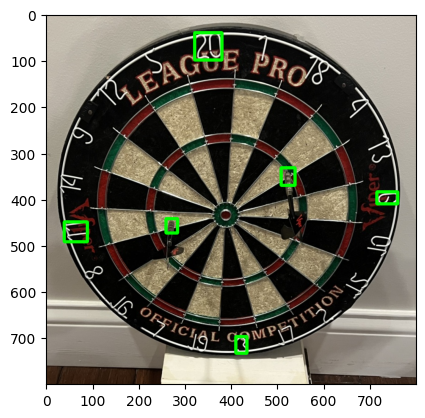

In [17]:
# Load the image RGB
image = cv.imread('../data/cropped/IMG_8561.jpg')

color_img = cv.cvtColor(image, cv.COLOR_RGB2BGR)  

# Load boundings
boundings = np.load('../data/boundings/IMG_8561_boundings.npy', allow_pickle=True)

print(image.shape)
print(boundings)

# Overlay boundings on image
for bounding in boundings:
    bounding = bounding['bounding_box']
    cv.rectangle(color_img, (bounding[0], bounding[1]), (bounding[2], bounding[3]), (0, 255, 0), 5)
    
# Show image
plt.imshow(color_img)
plt.show()

# Try to narrow down to circle further

In [3]:
# Get min and max x and y in boundings
min_x = 100000
max_x = 0
min_y = 100000
max_y = 0

for bounding in boundings:
    bounding = bounding['bounding_box']
    if bounding[0] < min_x:
        min_x = bounding[0]
    if bounding[2] > max_x:
        max_x = bounding[2]
    if bounding[1] < min_y:
        min_y = bounding[1]
    if bounding[3] > max_y:
        max_y = bounding[3]

print(min_x, max_x, min_y, max_y)

39 760 40 733


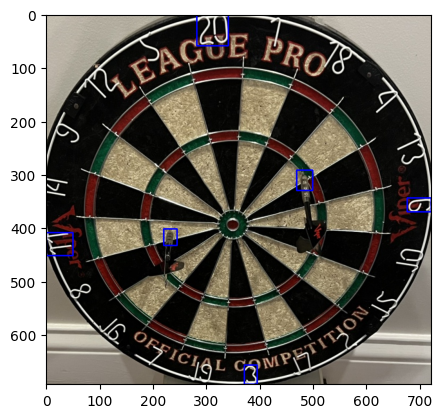

In [4]:

# crop image to min and max x and y in boundings
cropped_image = color_img[min_y:max_y, min_x:max_x]

# Show image
plt.imshow(cropped_image)
plt.show()

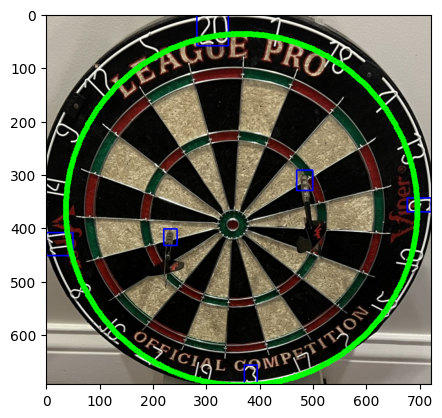

In [5]:
# Get points of a circle with radious of 10 pixels with a center at 0,0
circle_points = cv.ellipse2Poly((int(max_y/2), int(max_y/2)), (int((max_y*.9)/2), int((max_y*.9)/2)), 0, 0, 360, 1)

# Draw circle points on image
for point in circle_points:
    cv.circle(cropped_image, (point[0], point[1]), 3, (0, 255, 0), 3)

plt.imshow(cropped_image)
plt.show()

## Loop around circle with ROI (region of interest) to find rest of numbers

[675 479]


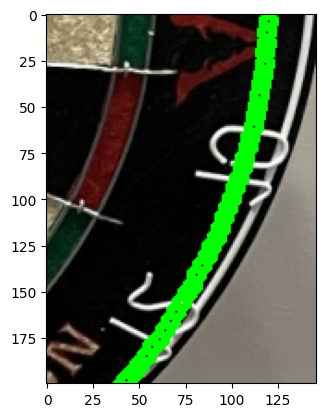

In [6]:
random_point = circle_points[20]
print(random_point)


# Get cropped area 100 pixel buffer around random point in image
cropped_area = cropped_image[random_point[1]-100:random_point[1]+100, random_point[0]-100:random_point[0]+100]

plt.imshow(cropped_area)
plt.show()